<a href="https://colab.research.google.com/github/AlfredoAragon1109/AlfredoAragon1109/blob/main/%F0%9F%A5%91_Clasificaci%C3%B3n_de_madurez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Qué tan maduro está un aguacate?  
🥑 Clasificación práctica de madurez con Machine Learning y Python  
Implementación con modelo Random Forest 🌲

*Por Alfredo Aragón*


¿A quién no le ha pasado? Vas a preparar un guacamole o simplemente quieres disfrutar un aguacate, abres esa fruta esperando la perfección… ¡y te encuentras con un aguacate duro como piedra o pasado de maduro que parece una sopa! 🥑😅

Decidir si un aguacate está en su punto exacto de madurez no siempre es tarea fácil. Por eso, en este notebook te mostraré cómo usar Python y Machine Learning para que una máquina pueda decirte si ese aguacate está listo para disfrutarlo o si mejor lo dejas un par de días más.

##🧾 Descripción del Dataset: Avocado Ripeness Classification

Se trata de un dataset sintético diseñado para simular un entorno de laboratorio donde se analizan aguacates con el fin de predecir su etapa de madurez usando variables físicas y de color.

🎯 Objetivo:
Predecir la variable ripeness (madurez) a partir de variables como la firmeza, color y sonido. Es un problema de clasificación multiclase.

Datos disponibles en https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset/data

##🔧 Variables del Dataset

## 🧾 Variables del Dataset de Madurez del Aguacate Hass 🥑

| Variable    | Nombre          | Descripción                                                                 | Rango               |
|----------------------|----------------------------|-----------------------------------------------------------------------------|---------------------|
| `firmness`           | **firmeza**                | Lectura del penetrómetro en Newtons (relacionada con la textura del fruto) | 10.0 - 100.0 N      |
| `hue`                | **tono**                   | Longitud de onda del color dominante (en grados)                            | 0 - 360°            |
| `saturation`         | **saturación**             | Pureza del color (%)                                                        | 0 - 100%            |
| `brightness`         | **brillo**                 | Intensidad de luz (%)                                                       | 0 - 100%            |
| `color_category`     | **categoría de color**     | Clasificación del color basado en valores HSB (black, purple, other)        | -                   |
| `sound_db`           | **respuesta acústica (dB)**| Nivel de sonido o resonancia en decibeles                                   | 30 - 80 dB          |
| `weight_g`           | **peso (g)**               | Peso del aguacate en gramos                                                 | 150 - 300 g         |
| `size_cm3`           | **tamaño (cm³)**           | Volumen del aguacate en centímetros cúbicos                                 | 100 - 300 cm³       |
| `ripeness`           | **madurez**                | 🔴 Variable objetivo: etapa de madurez del aguacate                         | ["hard", "pre-conditioned", "breaking", "firm-ripe", "ripe"] |



In [2]:
# Paquetes necesarios
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Estadísticas descriptivas y estructura

In [3]:

# Download latest version
path = kagglehub.dataset_download("amldvvs/avocado-ripeness-classification-dataset")

print("Path to dataset files:", path)
# Cargar el archivo CSV (buscamos uno dentro del path descargado)
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
data_path = os.path.join(path, csv_files[0])  # Usamos el primer CSV que aparezca

# Cargar en DataFrame
df = pd.read_csv(data_path)
df.head()

Path to dataset files: /kaggle/input/avocado-ripeness-classification-dataset


,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


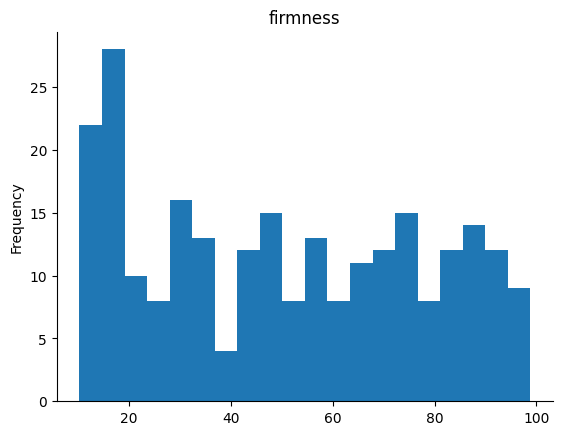

In [4]:
# @title firmness

from matplotlib import pyplot as plt
df['firmness'].plot(kind='hist', bins=20, title='firmness')
plt.gca().spines[['top', 'right',]].set_visible(False)

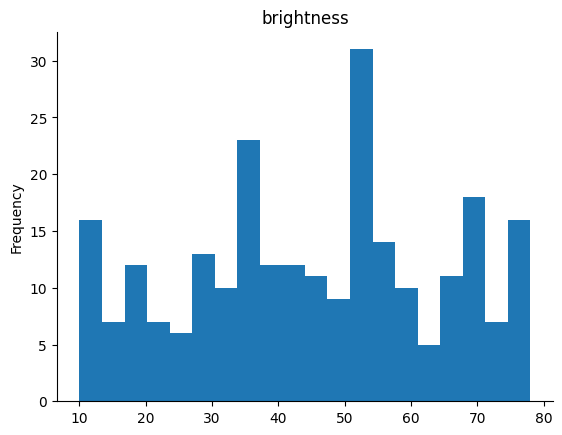

In [7]:
# @title brightness

from matplotlib import pyplot as plt
df['brightness'].plot(kind='hist', bins=20, title='brightness')
plt.gca().spines[['top', 'right',]].set_visible(False)

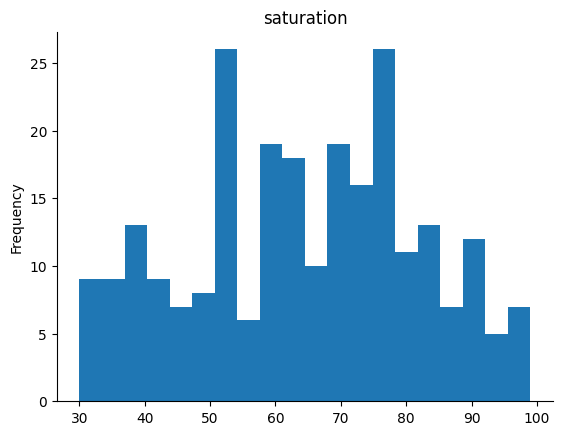

In [6]:
# @title saturation

from matplotlib import pyplot as plt
df['saturation'].plot(kind='hist', bins=20, title='saturation')
plt.gca().spines[['top', 'right',]].set_visible(False)

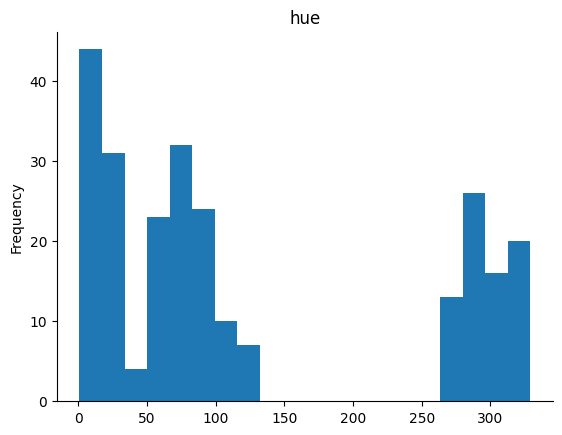

In [5]:
# @title hue

from matplotlib import pyplot as plt
df['hue'].plot(kind='hist', bins=20, title='hue')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-20-c1e059a1e5f7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='hue', y='color_category', inner='stick', palette='Dark2')


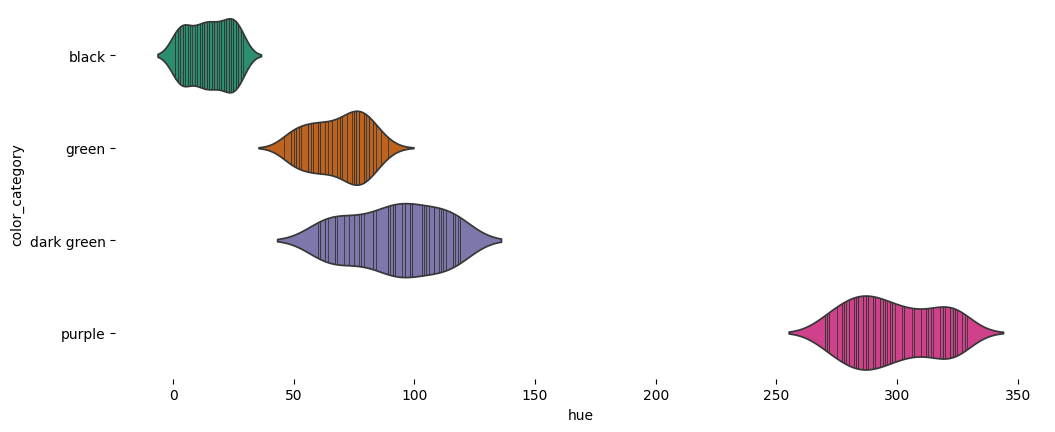

In [20]:
# @title color_category vs hue

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['color_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='hue', y='color_category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-17-4ab1a945b325>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='hue', y='ripeness', inner='stick', palette='Dark2')


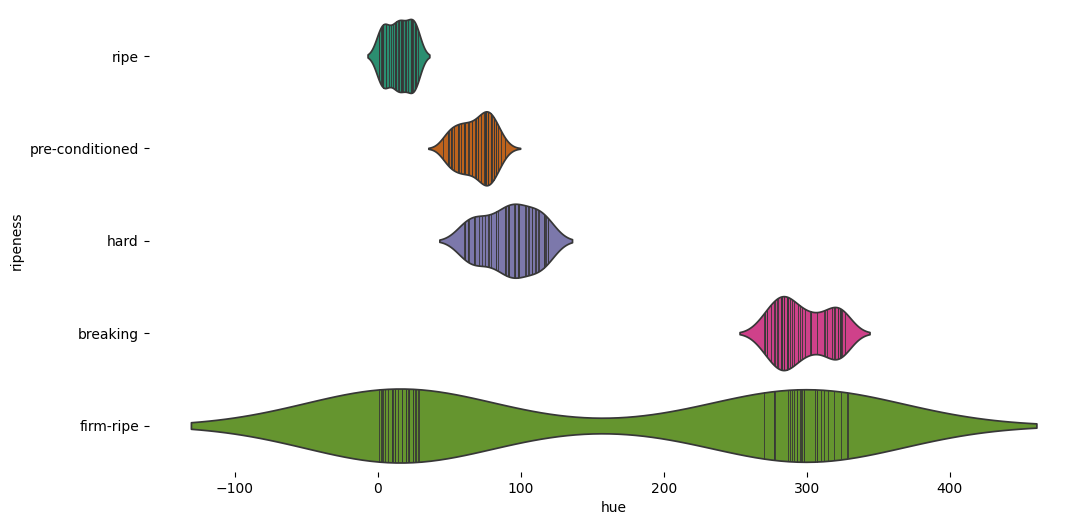

In [17]:
# @title ripeness vs hue

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['ripeness'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='hue', y='ripeness', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-15-7970096d8c4a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='firmness', y='ripeness', inner='stick', palette='Dark2')


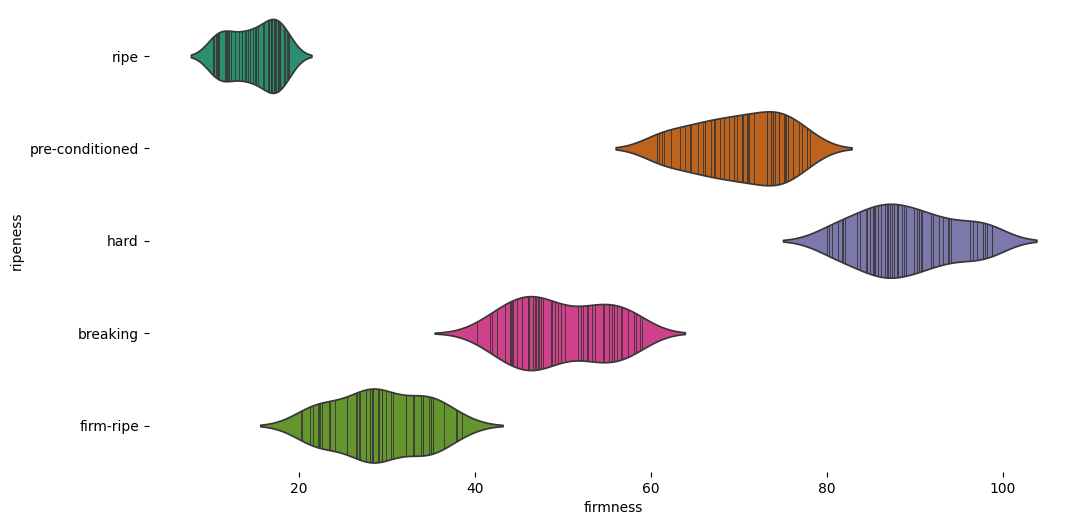

In [15]:
# @title ripeness vs firmness

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['ripeness'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='firmness', y='ripeness', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-14-9d078ab4d70f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='firmness', y='color_category', inner='stick', palette='Dark2')


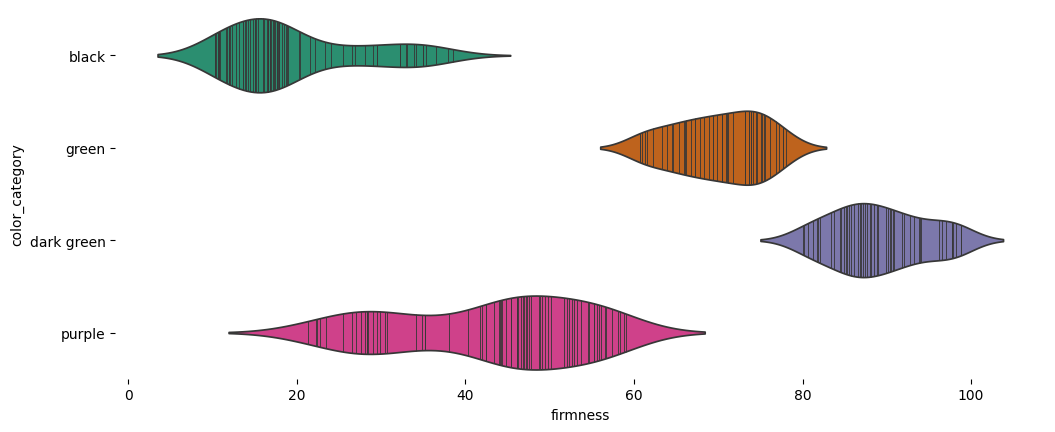

In [14]:
# @title color_category vs firmness

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['color_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='firmness', y='color_category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

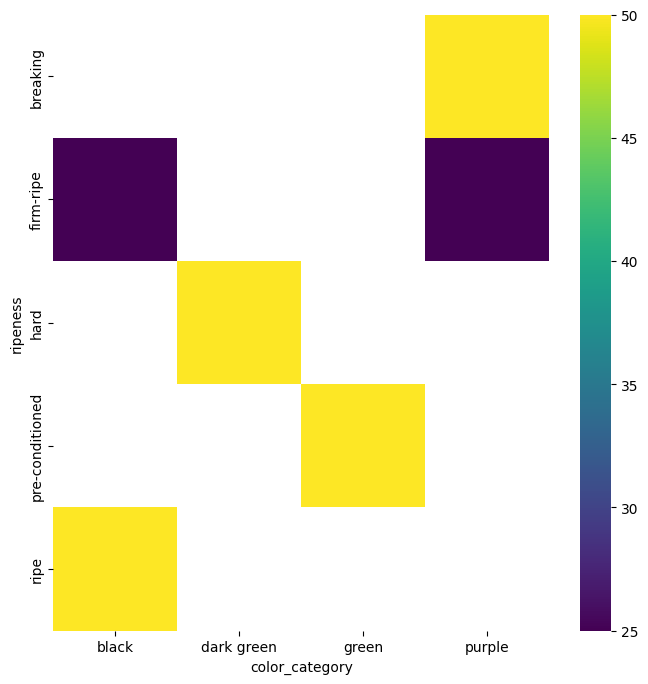

In [13]:
# @title color_category vs ripeness

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ripeness'].value_counts()
    for x_label, grp in df.groupby('color_category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('color_category')
_ = plt.ylabel('ripeness')

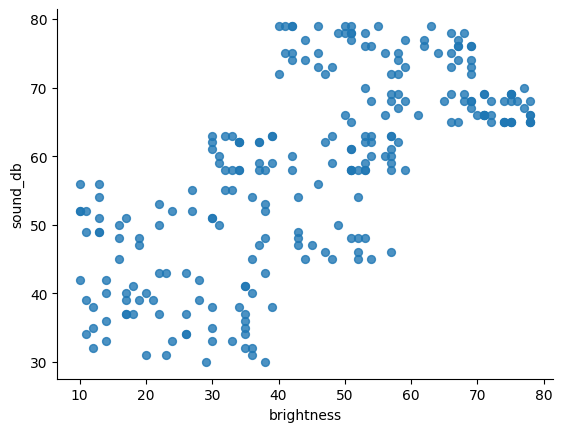

In [12]:
# @title brightness vs sound_db

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='brightness', y='sound_db', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

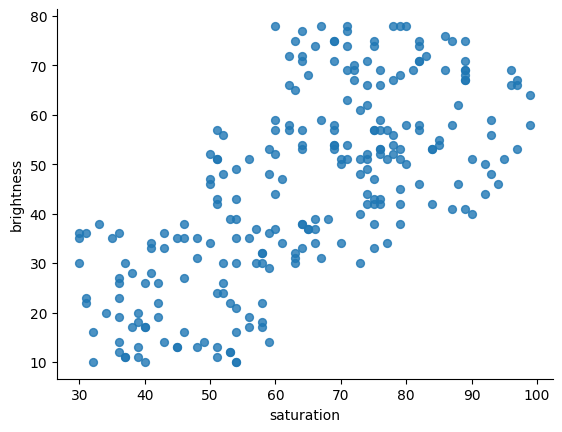

In [11]:
# @title saturation vs brightness

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='saturation', y='brightness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

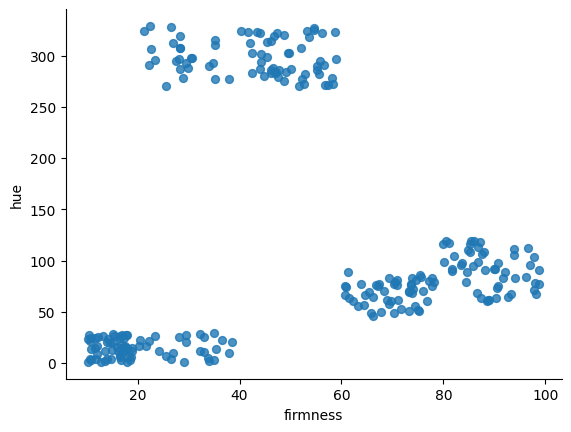

In [10]:
# @title firmness vs hue

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='firmness', y='hue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

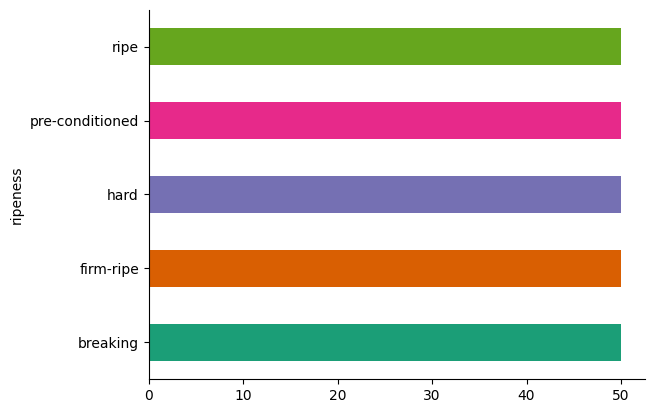

In [9]:
# @title ripeness

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('ripeness').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

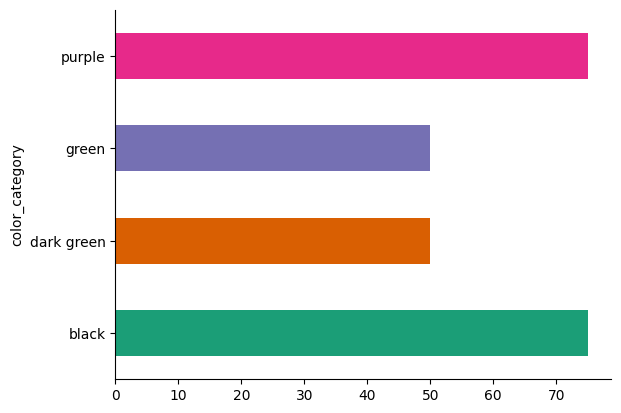

In [8]:
# @title color_category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('color_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Gráfico de Correlación (Matriz de calor)

<ipython-input-4-a663b9a11e8c>:20: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


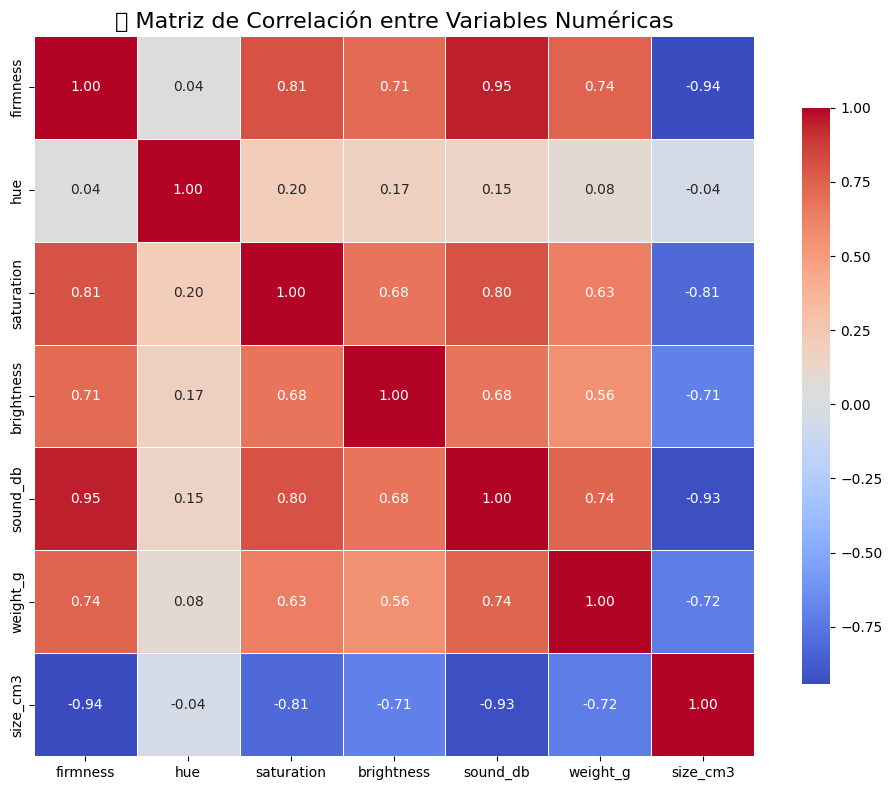

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas relevantes
numeric_cols = ['firmness', 'hue', 'saturation', 'brightness', 'sound_db', 'weight_g', 'size_cm3']

# Calcular la matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title("🔗 Matriz de Correlación entre Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-5-235ea9f38b8a>:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


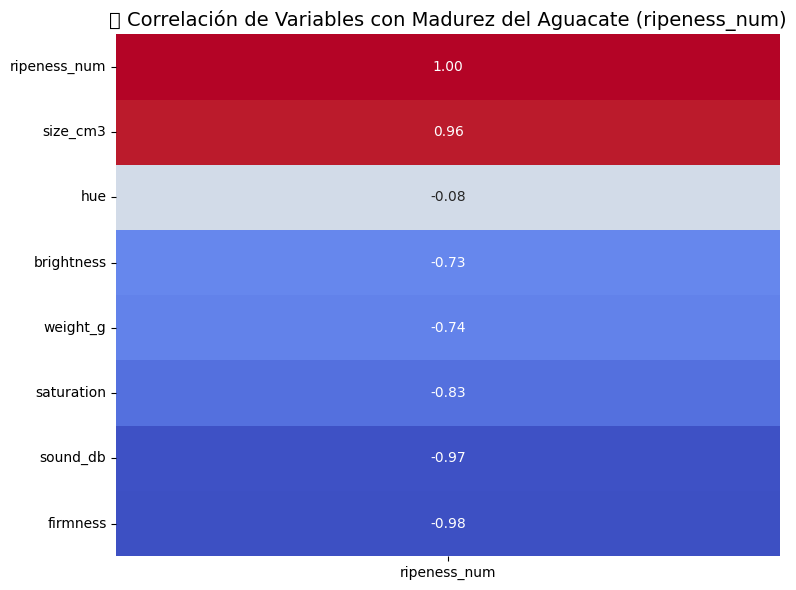

In [5]:
# Convertimos la variable categórica 'ripeness' en numérica usando un diccionario
ripeness_mapping = {
    "hard": 0,
    "pre-conditioned": 1,
    "breaking": 2,
    "firm-ripe": 3,
    "ripe": 4
}

# Crear nueva columna numérica
df['ripeness_num'] = df['ripeness'].map(ripeness_mapping)

# Verificamos la conversión
df[['ripeness', 'ripeness_num']].head()

# Añadimos la nueva columna a las variables de interés
vars_corr = ['firmness', 'hue', 'saturation', 'brightness', 'sound_db', 'weight_g', 'size_cm3', 'ripeness_num']

# Calculamos matriz de correlación
corr_with_ripeness = df[vars_corr].corr()[['ripeness_num']].sort_values(by='ripeness_num', ascending=False)

# Visualizamos solo la correlación con ripeness_num
plt.figure(figsize=(8, 6))
sns.heatmap(corr_with_ripeness, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, cbar=False)
plt.title("📊 Correlación de Variables con Madurez del Aguacate (ripeness_num)", fontsize=14)
plt.tight_layout()
plt.show()


### ✅ Modelos de Machine Learning (recomendados)

| Modelo                              | Ventajas                                                             | ¿Por qué usarlo aquí?                                               |
|-------------------------------------|----------------------------------------------------------------------|----------------------------------------------------------------------|
| **Random Forest** 🌲               | Robusto, maneja bien relaciones no lineales y variables categóricas | Ideal para conjuntos pequeños con variables numéricas              |
| **Gradient Boosting (XGBoost / LightGBM)** ⚡ | Alta precisión, buen manejo de overfitting                            | Muy efectivo en clasificación multiclase                            |
| **Logistic Regression Multiclase** 📈 | Rápido, interpretable                                                | Bueno como línea base (benchmark inicial)                          |
| **SVM (Support Vector Machine)** ✂️ | Preciso con conjuntos pequeños, funciona bien en espacios multidimensionales | Bueno si normalizas los datos                                      |
| **k-NN (k-Nearest Neighbors)** 👥    | Simple, basado en distancia                                          | Requiere normalización y puede volverse lento con muchos datos     |


### ✅ 🔢 Código para Random Forest

🔍 ¿Qué es un modelo Random Forest y cómo lo apliqué en mi análisis de madurez de aguacates?

Uno de los retos más interesantes en este proyecto fue predecir la etapa de madurez de un aguacate basándome en sus características físicas, como la firmeza, color (HSB), sonido, peso y volumen.

Para esta tarea, utilicé un modelo de Random Forest, una técnica de Machine Learning ampliamente utilizada para problemas de clasificación. 🌳

📚 ¿Qué es un Random Forest?
Un Random Forest es un algoritmo que crea múltiples árboles de decisión y combina sus resultados para hacer una predicción final. Es como preguntar a un grupo de expertos en vez de confiar en uno solo. Esto hace que el modelo sea:

✅ Más preciso
✅ Menos sensible al ruido
✅ Capaz de manejar variables numéricas y categóricas

🧪 ¿Cómo lo apliqué?
Preparé mis datos:
Eliminé columnas irrelevantes y definí la variable objetivo (ripeness_num), que representa la madurez en formato numérico.

* Dividí el dataset:
Separé los datos en entrenamiento (80%) y prueba (20%) para evaluar el desempeño del modelo de forma justa.

* Entrené el modelo:
Usé RandomForestClassifier con 100 árboles. Cada árbol “votó” por la clase más probable de madurez según las características ingresadas.

* Evalué el desempeño:
Con métricas como la matriz de confusión y el reporte de clasificación, verifiqué qué tan bien el modelo distinguía entre diferentes grados de madurez.

* Analicé la importancia de variables:
El modelo me mostró qué variables eran más relevantes. Por ejemplo, la firmeza y el hue (tono de color) resultaron clave para predecir la madurez. 📊

💡 Este modelo no solo me permitió hacer predicciones bastante precisas, sino también entender qué características físicas influyen más en la maduración del aguacate. ¡Una herramienta muy útil tanto para productores como para comercializadores! 🥑

📋 Reporte de clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



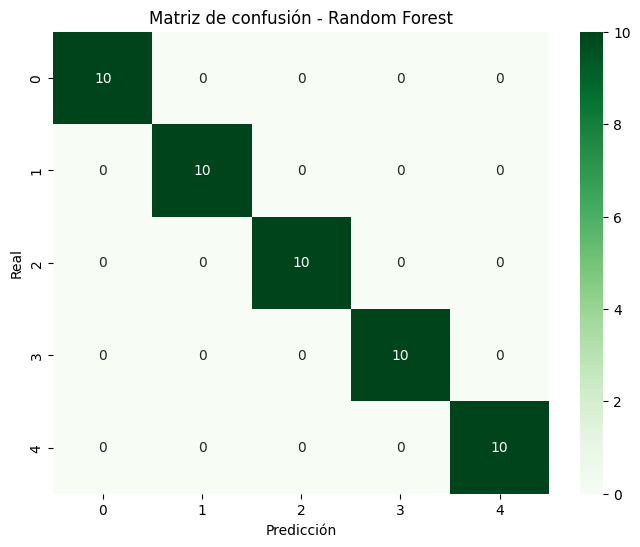

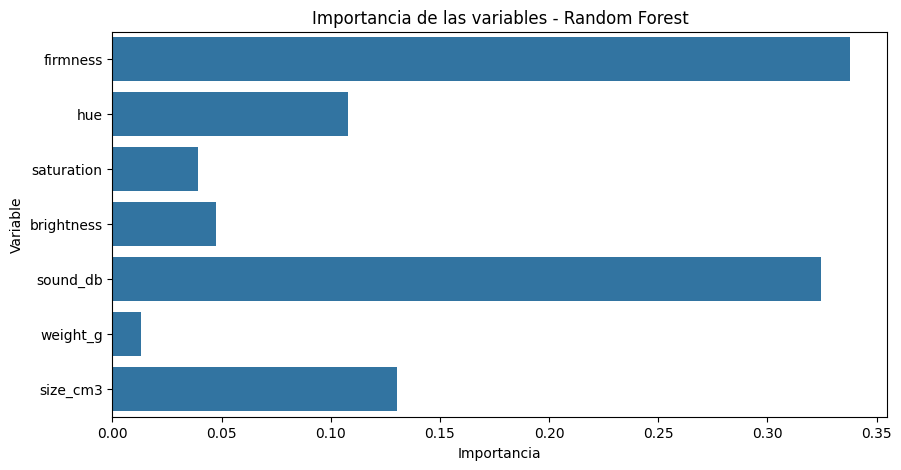

In [6]:
# Librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de tener la columna 'ripeness_num' (ya codificada numéricamente)
# Variables predictoras y target
X = df.drop(columns=["ripeness", "ripeness_num", "color_category"])  # Excluye target y columnas categóricas
y = df["ripeness_num"]

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenamiento del modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

# Resultados
print("📋 Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Importancia de las variables
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=features)
plt.title("Importancia de las variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()


## Evaluación del modelo

✅ Accuracy del modelo: 1.0
✅ F1-score macro: 1.0

📋 Reporte de clasificación completo:

                 precision    recall  f1-score   support

           hard       1.00      1.00      1.00        10
pre-conditioned       1.00      1.00      1.00        10
       breaking       1.00      1.00      1.00        10
      firm-ripe       1.00      1.00      1.00        10
           ripe       1.00      1.00      1.00        10

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



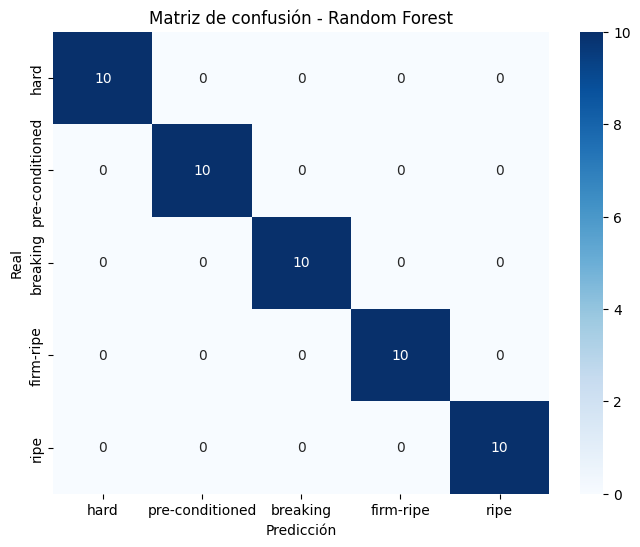

In [7]:
#Calculadora


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Diccionario para mapear de vuelta a los nombres de clase
etiquetas_clases = {
    0: "hard",
    1: "pre-conditioned",
    2: "breaking",
    3: "firm-ripe",
    4: "ripe"
}

# Predicciones
y_pred = rf.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')

print("✅ Accuracy del modelo:", round(accuracy, 3))
print("✅ F1-score macro:", round(f1_macro, 3))
print("\n📋 Reporte de clasificación completo:\n")
print(classification_report(y_test, y_pred, target_names=etiquetas_clases.values()))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=etiquetas_clases.values(),
            yticklabels=etiquetas_clases.values())
plt.title("Matriz de confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


🧠 Resultados del modelo Random Forest
El modelo de clasificación Random Forest mostró un rendimiento perfecto al predecir la etapa de madurez del aguacate 🍐.

📌 Métricas clave:

Accuracy: 1.00 ✅

F1-score macro: 1.00 ✅

Precisión y recall de 1.00 en todas las clases

📋 El reporte de clasificación evidencia que el modelo logró predecir correctamente las 5 etapas de madurez (hard, pre-conditioned, breaking, firm-ripe, ripe) sin cometer errores en el conjunto de prueba.

🎯 ¿Qué significa esto?
Esto sugiere que las variables físicas (firmeza, color, sonido, peso, tamaño) tienen un alto poder predictivo sobre la madurez del aguacate, al menos en este conjunto sintético y balanceado. También indica que el modelo está bien ajustado y no muestra señales de sobreajuste en los datos de prueba.

## 🧮Calculadora

In [22]:
import ipywidgets as widgets
from IPython.display import display

def calculadora_madurez_widget():
    # Sliders para cada variable
    firmness = widgets.FloatSlider(min=10.0, max=100.0, step=0.1, description='Firmeza (N):')
    hue = widgets.FloatSlider(min=0, max=360, step=1, description='Hue (°):')
    saturation = widgets.FloatSlider(min=0, max=100, step=1, description='Saturación (%):')
    brightness = widgets.FloatSlider(min=0, max=100, step=1, description='Brillo (%):')
    sound_db = widgets.FloatSlider(min=30, max=80, step=0.1, description='Sonido (dB):')
    weight_g = widgets.FloatSlider(min=150, max=300, step=1, description='Peso (g):')
    size_cm3 = widgets.FloatSlider(min=100, max=300, step=1, description='Volumen (cm³):')

    boton_predecir = widgets.Button(description="Predecir madurez 🧮", button_style='success')
    output = widgets.Output()

    def on_button_clicked(b):
        with output:
            output.clear_output()
            # Llamamos tu función de predicción (ajusta si tus inputs son distintos)
            pred = predecir_madurez(
                firmness.value, hue.value, saturation.value, brightness.value, sound_db.value, weight_g.value, size_cm3.value
            )
            print(f"👉 La madurez predicha del aguacate es: {pred}")

    boton_predecir.on_click(on_button_clicked)

    # Mostrar widgets
    display(firmness, hue, saturation, brightness, sound_db, weight_g, size_cm3, boton_predecir, output)

# Para usar la calculadora
calculadora_madurez_widget()


FloatSlider(value=10.0, description='Firmeza (N):', min=10.0)

FloatSlider(value=0.0, description='Hue (°):', max=360.0, step=1.0)

FloatSlider(value=0.0, description='Saturación (%):', step=1.0)

FloatSlider(value=0.0, description='Brillo (%):', step=1.0)

FloatSlider(value=30.0, description='Sonido (dB):', max=80.0, min=30.0)

FloatSlider(value=150.0, description='Peso (g):', max=300.0, min=150.0, step=1.0)

FloatSlider(value=100.0, description='Volumen (cm³):', max=300.0, min=100.0, step=1.0)

Button(button_style='success', description='Predecir madurez 🧮', style=ButtonStyle())

Output()